In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [2]:
data = pd.read_csv(r'car_evaluation.csv',header=None)
data.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
data.shape

(1728, 7)

# Rename columns name

In [4]:
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']

In [5]:
data.columns = col_names

In [6]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
for col in col_names:
    print(data[col].value_counts())
    

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


# Missing value in dataset

In [9]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

# Declare feature vector(X) and terget variable(y)

In [10]:
X = data.drop(['class'],axis=1)
y =data['class']

In [11]:
X.shape,y.shape

((1728, 6), (1728,))

# split data into train and test set

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.67,random_state=42)

In [13]:
X_train.shape,X_test.shape

((1157, 6), (571, 6))

# Feature Engineering 

In [14]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

Encode categorical variables

In [15]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [16]:
import category_encoders as CE

In [18]:
encoder = CE.OrdinalEncoder(cols = ['buying','maint','doors','persons','lug_boot','safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [19]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [20]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


# Decision Tree classifier with criterion gini index

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)

# fit the model
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

# Predict the test

In [28]:
y_pred_gini = clf_gini.predict(X_test)


# Checking accuracy score

In [32]:
from sklearn.metrics import accuracy_score

print("Model accuracy score with criterion gini index :{0:0.4f}".format((accuracy_score(y_test,y_pred_gini))))

Model accuracy score with criterion gini index :0.8021


# checking overfitting and underfitting

In [33]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train,y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test,y_test)))

Training set score: 0.7865
Test set score: 0.8021


# Visualize decision tree

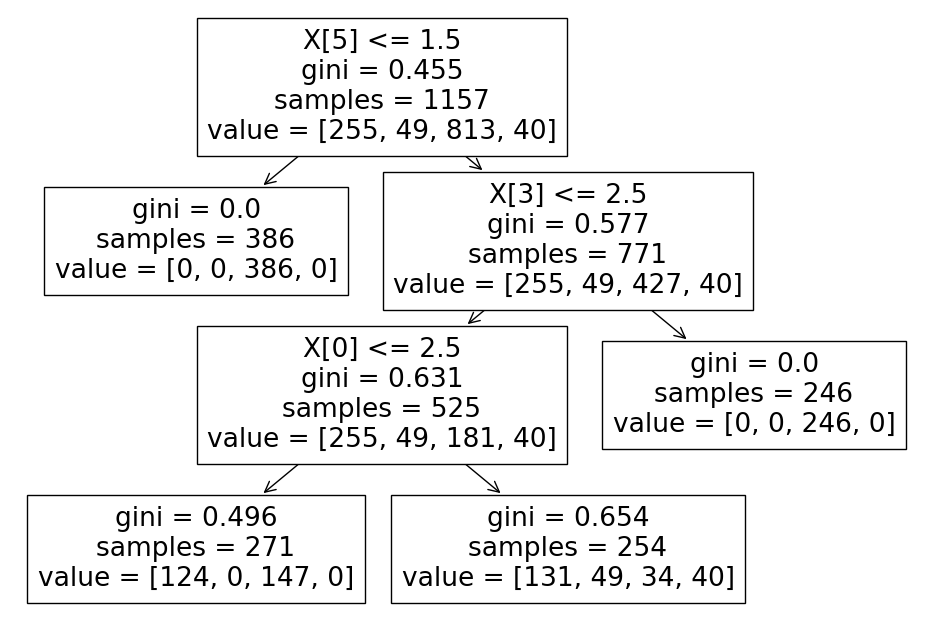

In [36]:
plt.figure(figsize=(12,8))

from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train,y_train))
plt.show()

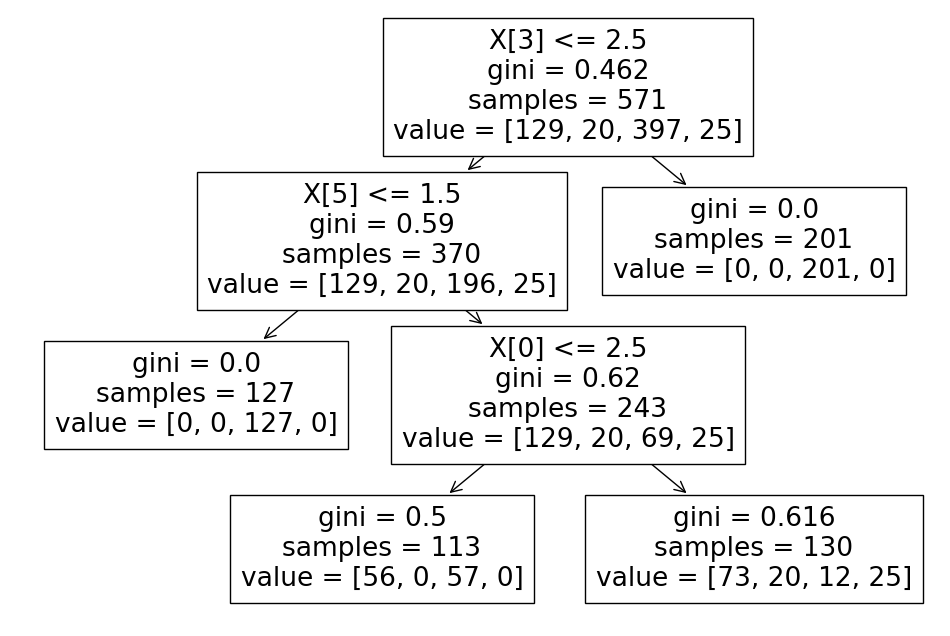

In [37]:
plt.figure(figsize=(12,8))

from sklearn import tree
tree.plot_tree(clf_gini.fit(X_test,y_test))
plt.show()

# clasification report

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_gini))

              precision    recall  f1-score   support

         acc       0.56      0.57      0.56       129
        good       0.00      0.00      0.00        20
       unacc       0.87      0.97      0.92       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.80       571
   macro avg       0.36      0.38      0.37       571
weighted avg       0.73      0.80      0.77       571



In [ ]:
s